## Check more details about image blending
https://docs.opencv.org/3.4/dc/dff/tutorial_py_pyramids.html

The sample code shows the left/right combination of apple and orange. The sample code creates 6-level Gaussian Pyramid and Laplacian Pyramid. Please see the detail comments of the implementation below.

## TO DO:
*   Define different combinations of apple and orange. 



In [1]:
## to access the google drive with the google account
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


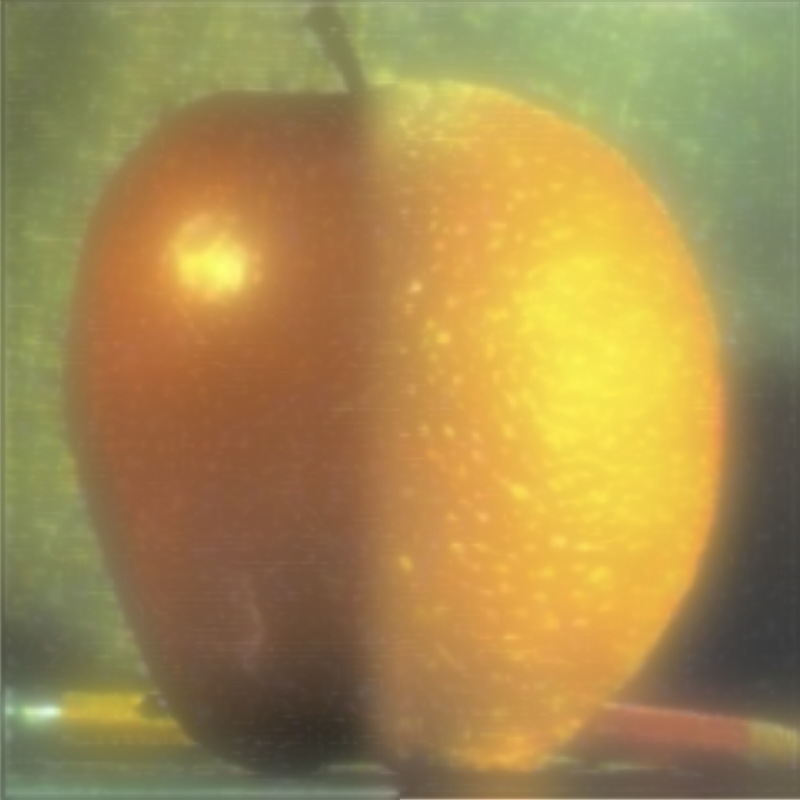

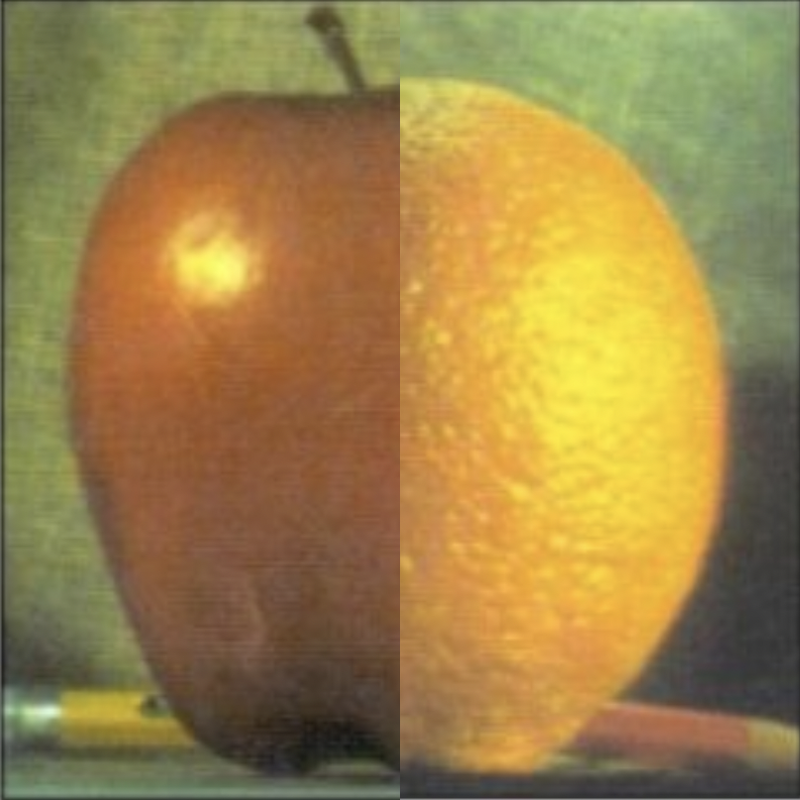

In [21]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow # for image display


img_path = '/content/drive/My Drive/Computer Vision/Assignment1/Part2/'

A = cv.imread(img_path+'apple.png')
B = cv.imread(img_path+'orange.png')

# generate Gaussian pyramid for A
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
# generate Gaussian pyramid for B
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
# generate Laplacian Pyramid for A
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
# generate Laplacian Pyramid for B
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)


# Now add left and right halves of images in each level
## This can be played with different combination.
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]

for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])

cv2_imshow(ls_)
print('\n')
# image with direct connecting each half
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

cv2_imshow(real)

In [52]:

# Now add left and right halves of images in each level
## This can be played with different combination.
# //3
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:rows//3], lb[:,rows//3:]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]

for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])

cv2_imshow(ls_)

# Reverse
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((lb[:, 0:cols//2], la[:, cols//2:]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]

for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])
cv2_imshow(ls_)

# Reverse and //5
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((lb[:, 0:cols//5], la[:, cols//5:]))
    LS.append(ls)
# now reconstruct
ls_ = LS[0]

for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])
cv2_imshow(ls_)


Output hidden; open in https://colab.research.google.com to view.